In [1]:
"""
Read all the smartwatch meal data 

"""
%load_ext autoreload
%autoreload 2
from ema import read

feasibility_df = read.smartwatch_feasibility()

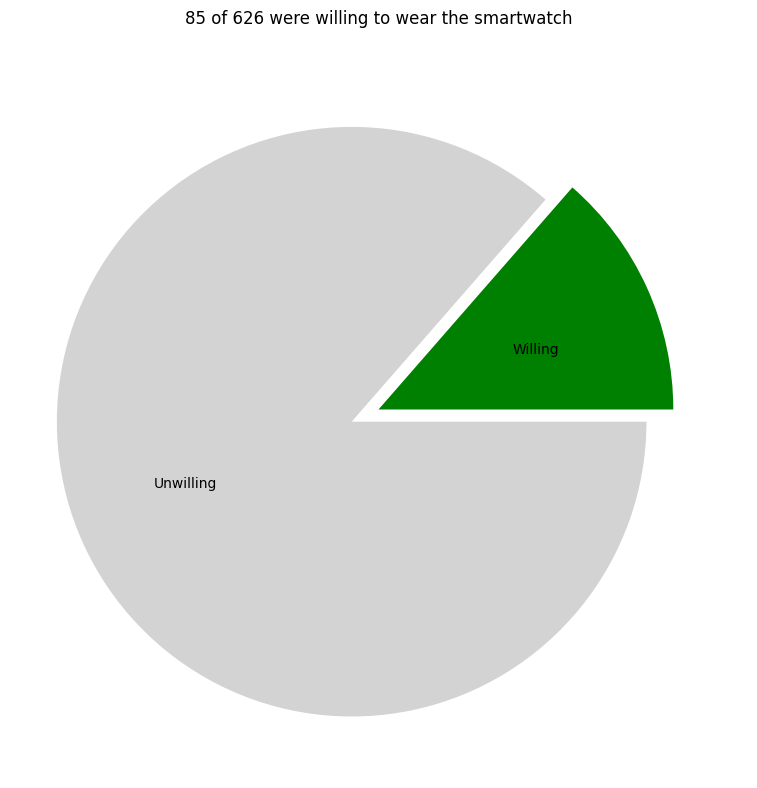

In [2]:
"""
Keep only the entries where participants were willing to wear the smartwatch

Plot a pie chart in the meantime

"""
import numpy as np
import matplotlib.pyplot as plt

accepted = feasibility_df["smartwatchwilling"] == 1
counts = [np.sum(accepted), len(accepted) - np.sum(accepted)]

# Guard against repeated running of this cell
assert counts[0] != len(
    accepted
), "All participants expected - has the df already been sliced?"

fig, axis = plt.subplots(figsize=(8, 8))
axis.pie(
    counts,
    explode=[0.0, 0.1],
    labels=["Willing", "Unwilling"],
    colors=["green", "lightgrey"],
    labeldistance=0.5,
)

fig.suptitle(
    f"{np.sum(accepted)} of {len(accepted)} were willing to wear the smartwatch"
)

fig.tight_layout()
fig.savefig("img/smartwatch_participation_pie.png")

# Slice the df
feasibility_df = feasibility_df[accepted]

In [3]:
"""
Add a new row translating the column headers into something more human readable

"""
import pandas as pd

if feasibility_df.columns.nlevels == 1:
    new_columns = list(feasibility_df)
    new_columns[4] = "Did your child participate in the smartwatch study?"
    new_columns[5] = "How many days in total did your child wear the smartwatch for?"
    new_columns[6] = "Did you participate in the smartwatch study?"
    new_columns[7] = "How many days in total did you wear the smarwatch for?"

    feasibility_df.columns = pd.MultiIndex.from_arrays(
        [new_columns, feasibility_df.columns], names=["readable", "default"]
    )

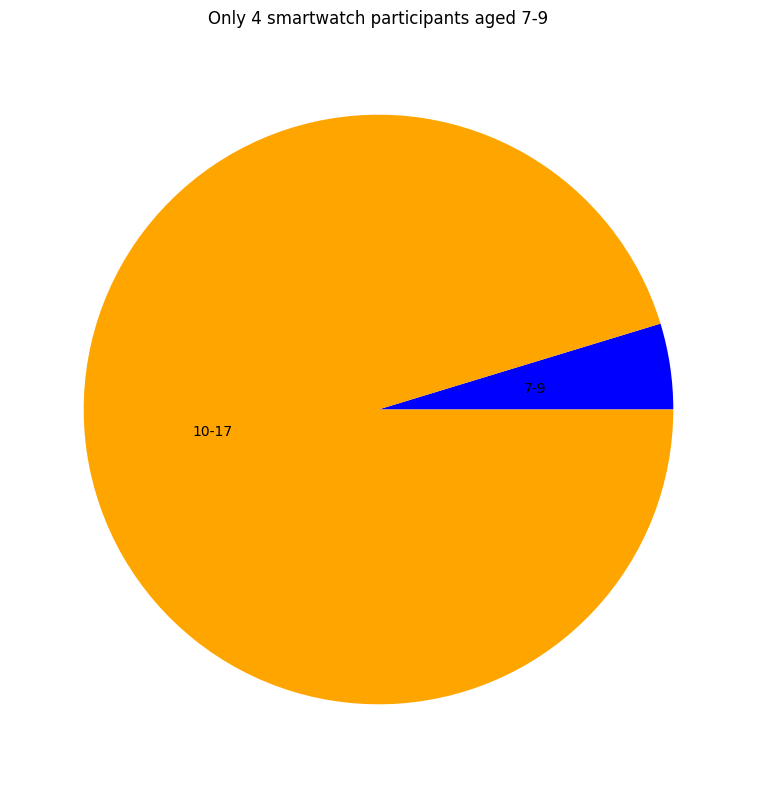

In [4]:
"""
Check that everyone answered one of the participation questions, but not both, then
see how many of each category we have

"""
is_young = (
    feasibility_df.xs("smart1_7to9", level="default", axis=1).notna().values.ravel()
)
is_old = (
    feasibility_df.xs("smart1_10to17", level="default", axis=1).notna().values.ravel()
)

# Check there's no overlap
assert True not in (is_young & is_old), np.unique(
    (is_young & is_old), return_counts=True
)

# Check there's no rows in neither
assert False not in (is_young | is_old), np.unique(
    (is_young | is_old), return_counts=True
)

fig, axis = plt.subplots(figsize=(8, 8))
axis.pie(
    [np.sum(is_young), np.sum(is_old)],
    labels=["7-9", "10-17"],
    colors=["blue", "orange"],
    labeldistance=0.5,
)

fig.suptitle(f"Only {np.sum(is_young)} smartwatch participants aged 7-9")

fig.tight_layout()
fig.savefig("img/smartwatch_age_pie.png")

[-0.6 -0.4  0.4  0.6  1.4  1.6  2.4  2.6  3.4  3.6  4.4  4.6  5.4  5.6
  6.4  6.6  7.4  7.6  8.4  8.6]


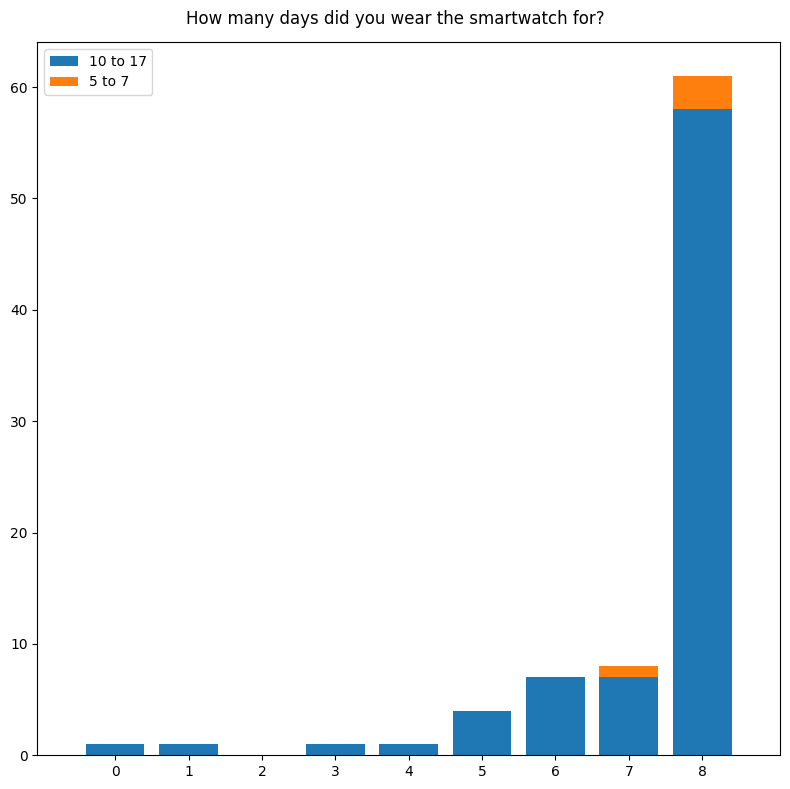

In [5]:
"""
Show how many days the participants wore the smartwatch for

"""
fig, axis = plt.subplots(figsize=(8, 8))

bins = np.linspace(-1, 8, 10) + 0.5
bins = np.sort(np.concatenate((bins - 0.1, bins+0.1)))
print(bins)

hist_kw = {
    "histtype": "bar",
    "bins": bins,
    "stacked": True,
}

data = []
for mask, column in zip((is_old, is_young), ("smart5_10to17", "smart5_7to9")):
    data.append(feasibility_df[mask].xs(column, level="default", axis=1).values.ravel())

axis.hist(data, **hist_kw, label=("10 to 17", "5 to 7"))
axis.legend()
axis.set_xticks(np.arange(0, 9))

fig.suptitle("How many days did you wear the smartwatch for?")
fig.tight_layout()

fig.savefig("img/smartwatch_days_hist.png")